In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import random

In [10]:
def read_data(file_name):
    df = pd.read_csv(file_name)
    df = df[(df['species']=='virginica')|(df['species']=='versicolor')]
    features = df[['petal_length', 'petal_width']].to_numpy()
    classes = df[['species']].to_numpy()
    df = df[['petal_length', 'petal_width', 'species']].to_numpy()
    return df, features, classes

In [11]:
data, features, classes = read_data('irisdata.csv')

In [12]:
class singleNN:
    def __init__(self, weights, b, length=3):
        self.w = np.zeros(length)
        self.w[0] = b
        self.w[1:length] = weights

    def compute_output(self, values):
        output = np.matmul(values, np.transpose(self.w[1:3])) + self.w[0]
        return 1/(1+np.exp(-output))
    
    def individual_compute_output(self, x1, x2):
        output = self.w[0] + x1*self.w[1] + x2*self.w[2]
        return 1/(1+np.exp(-output))
    
    def second(self, first):
        two = -(self.w[1]/self.w[2]) * first - (self.w[0]/self.w[2])
        return two
    
    def get_weights(self):
        return self.w
    
    def update_weights(self, weights):
        self.w = weights

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def derivative_sigmoid(z):
    return z*(1-z)

def decision_boundary_plot(features, classes, weights, b):
    neuralNetwork = singleNN(weights, b)
    petal_length = np.linspace(3,7,40)
    petal_width = neuralNetwork.second(petal_length)
    
    plt.plot(petal_length, petal_width, c="black")
    color = ["blue" if label=='virginica' else 'red' for label in classes]
    plt.scatter(np.array(features)[:,0], np.array(features)[:,1], marker='o', c = color)
    plt.xlabel('petal length')
    plt.ylabel('petal width')
    plt.title('Linear Decision Boundary using Sigmoid Function')
    plt.show()

def mse_given_data(data, pattern, weights, b, learning_rate):
    sNN = singleNN(weights, b)
    w = weights
    w1_update = 0
    w2_update = 0
    b_update = 0
    total_squared_residual = 0
    for i in range(len(data)):
        output = b + (data[i][0] * weights[0]) + (data[i][1] * weights[1])
        sig = sigmoid(output)
        dSig = derivative_sigmoid(sig)
        
        if pattern[i] == 'versicolor':
            actual = 0
        else:
            actual = 1
        
        residual = sig-actual
        squared_residual = (residual)**2
        b_update += (residual * dSig)
        w1_update += (residual * dSig) * data[i][0]
        w2_update += (residual * dSig) * data[i][1]
        total_squared_residual += squared_residual
        
    w[0] = weights[0] - learning_rate * (w1_update * 2 / (len(data)))
    w[1] = weights[1] - learning_rate * (w2_update * 2 / (len(data)))
    b = b - learning_rate * (b_update * 2 / (len(data)))
    
    mse = total_squared_residual / (len(data))
    
    return mse, w, b
            
def mse_given_labels(predicted, actual):
    return ((predicted-actual)**2)/(len(predicted))


def plot_gradient_descent(features, classes, weights, b):
    sNN1 = singleNN(weights, b)
    petal_length = np.linspace(3,7,40)
    petal_width = sNN1.second(petal_length)
    plt.plot(petal_length, petal_width, c="orange")
    
    mse, new_weights, new_b = mse_given_data(features, classes, weights, b, 0.1)
    print("initial mse: ", mse, "\ninital weights: ", weights, "\ninitial bias: ", b)
    sNN2 = singleNN(new_weights, new_b)
    updated_petal_length = np.linspace(3,7,40)
    updated_petal_width = sNN2.second(updated_petal_length)
    plt.plot(updated_petal_length, updated_petal_width, c="green")
    
    new_mse, second_weights, second_b = mse_given_data(features, classes, new_weights, new_b, 1)
    print("new mse: ", new_mse, "\nnew weights: ", new_weights, "\nnew bias: ", new_b)
    
    color = ["blue" if label=='virginica' else 'red' for label in classes]
    plt.scatter(np.array(features)[:,0], np.array(features)[:,1], marker='o', c = color)
    plt.xlabel('petal length')
    plt.ylabel('petal width')
    plt.title('Linear Decision Boundary using Sigmoid Function')
    plt.show()

### Problem 3b:
The first graph is the large error weights/bias.
The second graph is the small error weights/bias.

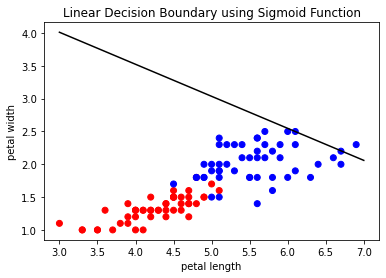

0.2249673607749356

In [13]:
weights = np.array([0.41, 0.84])
b = -4.6
decision_boundary_plot(features, classes, weights, b)
mse, w, new_b = mse_given_data(features, classes, weights, b, 0.05)
mse

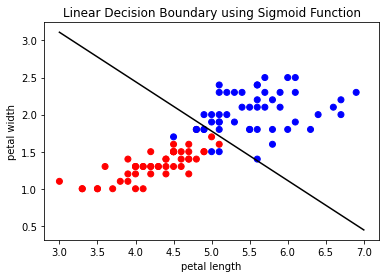

0.12529717944530414

In [14]:
weights = np.array([0.6, 0.9])
b = -4.6
decision_boundary_plot(features, classes, weights, b)
mse, w, new_b = mse_given_data(features, classes, weights, b, 0.05)
mse

initial mse:  0.16646612281878398 
inital weights:  [0.22338466461904183, 0.8101296968610548] 
initial bias:  -2.5
new mse:  0.16123934750561766 
new weights:  [0.3596189746983812, 0.8776983441372131] 
new bias:  -2.4974500779067528


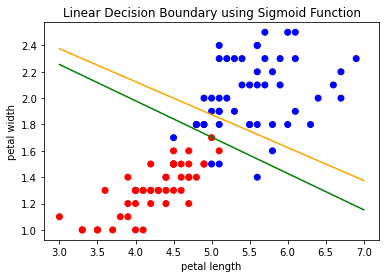

In [15]:
weights = [0.2, 0.8]
b = -2.5
plot_gradient_descent(features, classes, weights, b)